In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Linear data for regression

In [ ]:
class LinearDataGenerator:
    def __init__(self, slope, intercept):
        self.slope = slope
        self.intercept = intercept
    
    def sample(self, num_samples: int, indep_var_range: Tuple[float, float]=(0, 1)):
        assert type(num_samples) is int
        assert num_samples > 0
        assert indep_var_range[1] > indep_var_range[0]
        
        range = indep_var_range[1] - indep_var_range[0]
        x = np.random.sample((num_samples, )) * range + indep_var_range[0]
        return x, x * self.slope + self.intercept

In [ ]:
data_gen = LinearDataGenerator(1, 2)
x, y = data_gen.sample(10, (-10, 10))
plt.scatter(x, y)
plt.show()

## Random clusters for classification

In [ ]:
class ClusterDataGenerator:
    def __init__(self, cluster_centers, cluster_spreads):
        self.centers = cluster_centers
        self.spreads = cluster_spreads
        self.num_clusters = len(cluster_centers)
        
    def sample(self, num_samples):
        samples = []
        labels = []
        l = 0
        for center, spread in zip(self.centers, self.spreads):
            num_cluster_samples = (int(num_samples / self.num_clusters), len(center))
            labels.extend([l] * num_cluster_samples[0])
            s = np.random.normal(center, spread, num_cluster_samples)
            samples.extend(list(s))
            l += 1
            
        return np.asarray(samples), np.asarray(labels)

In [ ]:
data_gen = ClusterDataGenerator(((-1, 1), (1, 1)), (0.5, 0.5))
samples, labels = data_gen.sample(200)

plt.scatter(samples[labels == 0, 0], samples[labels == 0, 1], c='r')
plt.scatter(samples[labels == 1, 0], samples[labels == 1, 1], c='b')
plt.show()

## MNIST

In [3]:
train_images_url = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
train_labels_url = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
test_images_url = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
test_labels_url = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'

from urllib.request import urlretrieve
urlretrieve(train_images_url, 'train-images-idx3-ubyte.gz')

('train-images-idx3-ubyte.gz', <http.client.HTTPMessage at 0x18b3d2ac240>)

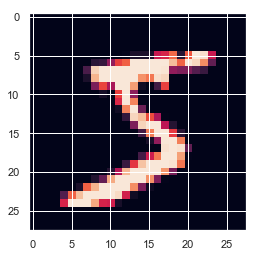

In [36]:
path = 'train-images-idx3-ubyte.gz'
import struct
with gzip.open(path, 'rb') as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    data = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    
import matplotlib.pyplot as plt

plt.imshow(data[0])
plt.show()